# Water Sheet

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import solarpy
import datetime

currentDir = os.getcwd()
sys.path.append(os.path.join(currentDir, '../code/'))
import geomUtils as geom
import IceSheet

### Simulate a Day or Two

In [2]:
# __init__
dateTimeStart = datetime.datetime(2021, 2, 21, 0, 0)
myIce = IceSheet.IceSheet(dateTime=dateTimeStart, sheet='blackIce', thickness=200.0, crystalSize=100.0, lat=55.71, alt=10)
myWater = IceSheet.IceSheet(dateTime=dateTimeStart, sheet='freshWater', thickness=400.0, crystalSize=100.0, lat=55.71, alt=10)
myWater.setTransmittance(myIce)

When: 2021-02-21 00:00:00
Where: lat = 55.71°, alt = 10 m
What: blackIce
When: 2021-02-21 00:00:00
Where: lat = 55.71°, alt = 10 m
What: freshWater


In [3]:
# setupModel
spatialNodeCount = 101
timeStep = 2*60  # s
aEnv=[0.05, 0.9, 0.05]
TEnv=[-2.0, -20.0, -270.]
aEnvW=[1.]
TEnvW=[0.]

# get started
# A, B, b, UInit = myIce.setupModel(IC=[-0.92, 0.], windSpeed=5., aEnv=aEnv, TEnv=TEnv, zNodes=spatialNodeCount, tStep=timeStep, isVerbose=True)
AW, BW, bW, UInitW = myWater.setupModel(IC=[0., 3.], aEnv=aEnv, TEnv=TEnv, fluidVelocity=0.2, zNodes=spatialNodeCount, tStep=timeStep, isVerbose=True)

thermal diffusivity a = 1.33e-07 m2/s
spatial stepsize dz = 4.00 mm
temporal stepsize dt = 120.00 s
timescale tScale = 1204901.8 s
sigma = 0.49796588051607477
[[ 1.99593176 -0.49796588  0.         ...  0.          0.
   0.        ]
 [-0.49796588  1.99593176 -0.49796588 ...  0.          0.
   0.        ]
 [ 0.         -0.49796588  1.99593176 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.99593176 -0.49796588
   0.        ]
 [ 0.          0.          0.         ... -0.49796588  1.99593176
  -0.49796588]
 [ 0.          0.          0.         ...  0.         -0.49796588
   1.99593176]]
50 [1.   1.06 1.12 1.18 1.24 1.3  1.36 1.42 1.48 1.54 1.6  1.66 1.72 1.78
 1.84 1.9  1.96 2.02 2.08 2.14 2.2  2.26 2.32 2.38 2.44 2.5  2.56 2.62
 2.68 2.74 2.8  2.86 2.92 2.98 3.04 3.1  3.16 3.22 3.28 3.34 3.4  3.46
 3.52 3.58 3.64 3.7  3.76 3.82 3.88 3.94 4.   4.   4.   4.   4.   4.
 4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.
 4.   4.   4.   4. 

In [4]:
bW.shape

(101,)

In [5]:
myWater._b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
bW

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
myWater._IC  #[0], myWater._IC[-1]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [8]:
myWater._THi, myWater._TLo

(3.0, 0.0)

In [9]:
# simulate
totalTime = 48*3600  # s
timeStepCount = totalTime//timeStep
timeStepCount

1440

In [10]:
# dateTimes, S0s, USoln, epsSoln = myIce.simulate(UInit, aEnv, TEnv, timeStepCount)
dateTimes, S0sW, USolnW, botMeltRates = myWater.simulate(UInitW, aEnvW, TEnvW, timeStepCount)

In [11]:
USolnW.shape

(1440, 101)

In [12]:
S0s = S0sW
idxSunUp = []
idxSunDn = []
for i in range(len(dateTimes)):
    if S0s[i] > 0 and S0s[i-1] == 0:
        idxSunUp.append(i)
    if S0s[i] == 0 and S0s[i-1] > 0:
        idxSunDn.append(i-1)
print(idxSunUp, idxSunDn)

[] []


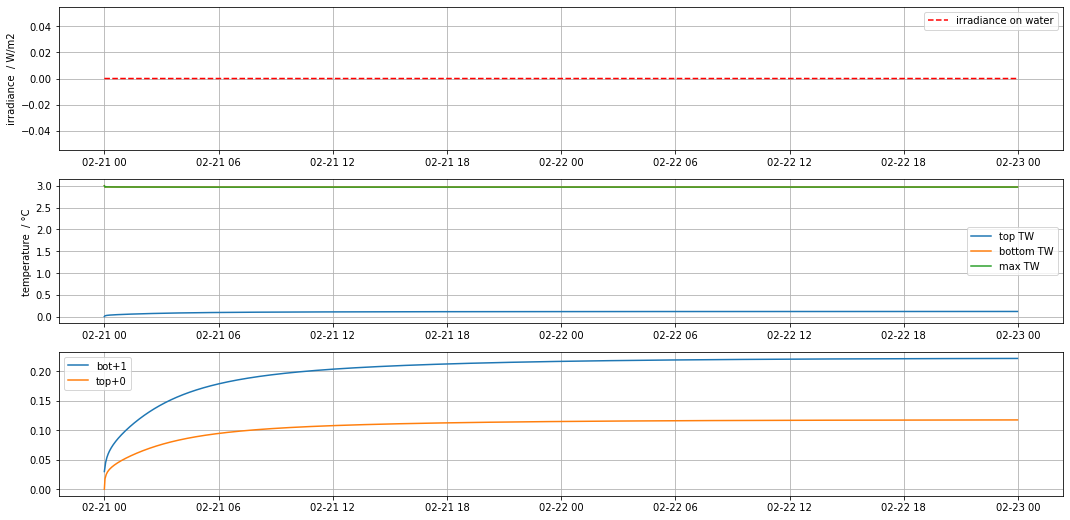

In [13]:
UMaxsW = []
for j in range(len(USolnW)):
    UMaxsW.append(np.max(USolnW[j, :]))

nPlot = 3
fig, axs = plt.subplots(nPlot, 1, figsize=(18, nPlot*3))
i = 0
axs[i].plot(dateTimes, S0sW, '--', color='red', label='irradiance on water')
axs[i].set_ylabel('irradiance  / W/m2')
i = 1
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, 0]), label='top TW')
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, -1]), label='bottom TW')
axs[i].plot(dateTimes, myWater.makeUOneD(np.array(UMaxsW)), label='max TW')
axs[i].set_ylabel('temperature  / °C')
i = 2
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, 1]), label='bot+1')
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, 0]), label='top+0')
for i in range(nPlot):
    for j in range(len(idxSunUp)):
        axs[i].axvspan(dateTimes[idxSunUp[j]], dateTimes[idxSunDn[j]], color='yellow', alpha=0.2)
    axs[i].grid()
    axs[i].legend()    

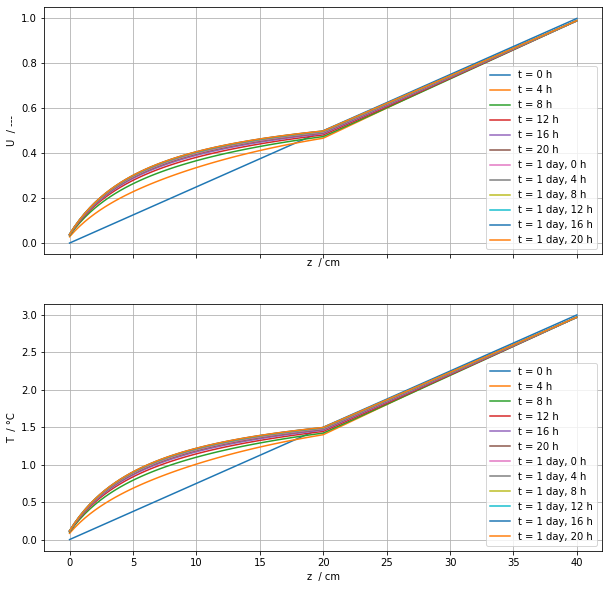

In [14]:
TSolnW = myWater.makeUOneD(USolnW)

zW = np.linspace(0, spatialNodeCount, spatialNodeCount)*myWater._h/spatialNodeCount*100  # cm

plotInterval = 4  # h
idxInterval = (plotInterval*3600)//timeStep

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
for j in list(range(len(USolnW)))[::idxInterval]:
    timeLabel = 't = '+'{} h'.format(str(dateTimes[j]-dateTimes[0])[:-6])
    i = 0
    axs[i].plot(zW, USolnW[j, :], label=timeLabel)
    axs[i].set_ylabel('U  / ---')
    i = 1
    axs[i].plot(zW, TSolnW[j, :], label=timeLabel)
    axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].set_xlabel('z  / cm')
    axs[i].legend()
    axs[i].grid()